In [1]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import random

In [2]:
from datasets import load_dataset
datasets = load_dataset('smilegate-ai/kor_unsmile')

Using custom data configuration smilegate-ai--kor_unsmile-e0f75c6e3be1af78
Reusing dataset parquet (/Users/sonak_bee/.cache/huggingface/datasets/parquet/smilegate-ai--kor_unsmile-e0f75c6e3be1af78/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901)


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
from transformers import TextClassificationPipeline, BertForSequenceClassification, AutoTokenizer
model_name = 'smilegate-ai/kor_unsmile'
model = BertForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
pipe = TextClassificationPipeline(
        model = model,
        tokenizer = tokenizer,
        device = -1,   # cpu: -1, gpu: gpu number
        return_all_scores = True,
        function_to_apply = 'sigmoid'
    )



In [4]:
df3 = pd.read_csv('/Users/sonak_bee/Desktop/이재명/이재명result1.csv', encoding='utf-8')

In [5]:
df3

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,0,0,2022-02-08 23:59:52+00:00,1.491200e+18,진짜 다급하긴 한가 보다.\n\n이재명 “취임 시 지난 2년간 발생한 자영업자 손실...,atree4you
1,1,1,1,2022-02-08 23:59:45+00:00,1.491200e+18,"윤석열 ""단일화, 서로 신뢰한다면 \n10분 안에도 끝낼 수 있다""\n\n…❅❅✤❀...",eunsang_i
2,2,2,2,2022-02-08 23:59:44+00:00,1.491200e+18,"이재명 만나 ‘유능’ 강조한 윤여준 “경제 모르는 대통령, 국민에게 공포”@news...",newsvop
3,3,3,3,2022-02-08 23:59:33+00:00,1.491200e+18,@lawyerhyun7 부끄러어라 ㅋㅋ이낙연이면 벌써이기고도남았늘것 ㅋㅋ이럴줄몰랐니...,solo53732152
4,4,4,4,2022-02-08 23:58:42+00:00,1.491200e+18,"이재명 ""中 불법 어선 격침해버려야..할 말은 한다"" | 다음 뉴스 https://...",jyojyo74535529
...,...,...,...,...,...,...,...
29044,8011,998,996,2022-03-08 21:14:31+00:00,1.501305e+18,문제는 그 해명이란게 이재명이 주둥이뿐.... [英 베팅업체가 본 한국 대선 승자는...,gksqjq
29045,8012,999,997,2022-03-08 21:14:25+00:00,1.501305e+18,@wonheeryong @lanice01 님은 부끄러움 일도 없나요. 이재명도 부끄...,jkyuho0305
29046,8013,1000,998,2022-03-08 21:14:24+00:00,1.501305e+18,"""이재명은 난 놈이야. 욕 많이 했지""‥공익환수 비난한 김만배 (2022.03.07...",IamaKoreanciti1
29047,8014,1001,999,2022-03-08 21:14:00+00:00,1.501305e+18,이재명의 사법부 장악 의혹 보도에 가장 놀랐을 것 같은 이가 김경수일 것 같다.,eagle_3rd


In [6]:
del df3["Unnamed: 0.2"]
del df3["Unnamed: 0.1"]
del df3["Unnamed: 0"]

In [7]:
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [8]:
import re
import re

# Basic Cleaning Text Function
def CleanText(readData, Num=False, Eng=False):

    # Remove Retweets RT @user_screenname 
    text = re.sub('RT @[\w_]+: ', '', readData)
    text = re.sub('알티', '', text)

    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)

    # Remove or Replace URL 
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) # http로 시작되지 않는 url
    
    # Remove Hashtag
    text = re.sub('[#]+[0-9a-zA-Z_]+', ' ', text)

    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)

    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    
    # Remove newline
    text = text.replace('\n',' ')
    
    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+',' ',text)
    
    if Eng is True:
        # Remove English 
        text = re.sub('[a-zA-Z]' , ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())
       
    return text

In [9]:
df3['Text'] = df3['Text'].apply(lambda x: CleanText(str(x)))

In [10]:
df3 = df3.dropna(axis=0)

In [11]:
result1 = []
for t in df3['Text'].astype(str):
    result1.extend(pipe(t))

In [12]:
label =  ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']

In [13]:
score = [[item['score'] for item in i] for i in result1]

In [14]:
score = np.round(score,2)

In [15]:
new_df = pd.DataFrame(score, columns=label)

new_df.insert(0, 'text', df3['Text']) # 앞에 숫자가 순서(왼쪽->오른쪽)

In [16]:
new_df

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
0,진짜 다급하긴 한가 보다 이재명 취임 시 지난 2년간 발생한 자영업자 손실 모두 보...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.12,0.84
1,윤석열 단일화 서로 신뢰한다면 10분 안에도 끝낼 수 있다 문재인 이재명보다 훨씬 ...,0.01,0.00,0.01,0.04,0.00,0.02,0.03,0.03,0.38,0.26
2,이재명 만나 유능 강조한 윤여준 경제 모르는 대통령 국민에게 공포,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.11,0.87
3,부끄러어라 ㅋㅋ이낙연이면 벌써이기고도남았늘것 ㅋㅋ이럴줄몰랐니 목에 칼이들어와도 이재...,0.01,0.01,0.01,0.01,0.00,0.03,0.01,0.01,0.48,0.27
4,이재명 불법 어선 격침해버려야 할 말은 한다 다음 뉴스,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.25,0.65
...,...,...,...,...,...,...,...,...,...,...,...
29009,이재명 무죄 2020년 7월16일이었는데 측근 임모 씨 6월24일에 결과 알았다 이...,0.01,0.01,0.01,0.02,0.00,0.02,0.03,0.01,0.23,0.41
29010,이재명,0.01,0.01,0.01,0.01,0.00,0.02,0.02,0.02,0.56,0.38
29011,독일입니다 이재명 대통령이라 불러보길 소망합니다 조금만 더 역사의 수레바퀴가 돌길 ...,0.01,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.12,0.83
29012,청계광장 구름 인파 이재명 어게인 2002 승리 역사 만들어달라 촛불집회 장소에서 ...,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.09,0.87


In [17]:
new_df2 = pd.DataFrame(score, columns=label)
new_df2['result'] = new_df2.idxmax(axis = 1)
new_df2

,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,result
0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.12,0.84,clean
1,0.01,0.00,0.01,0.04,0.00,0.02,0.03,0.03,0.38,0.26,악플/욕설
2,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.11,0.87,clean
3,0.01,0.01,0.01,0.01,0.00,0.03,0.01,0.01,0.48,0.27,악플/욕설
4,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.25,0.65,clean
...,...,...,...,...,...,...,...,...,...,...,...
29009,0.01,0.01,0.01,0.02,0.00,0.02,0.03,0.01,0.23,0.41,clean
29010,0.01,0.01,0.01,0.01,0.00,0.02,0.02,0.02,0.56,0.38,악플/욕설
29011,0.01,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.12,0.83,clean
29012,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.09,0.87,clean


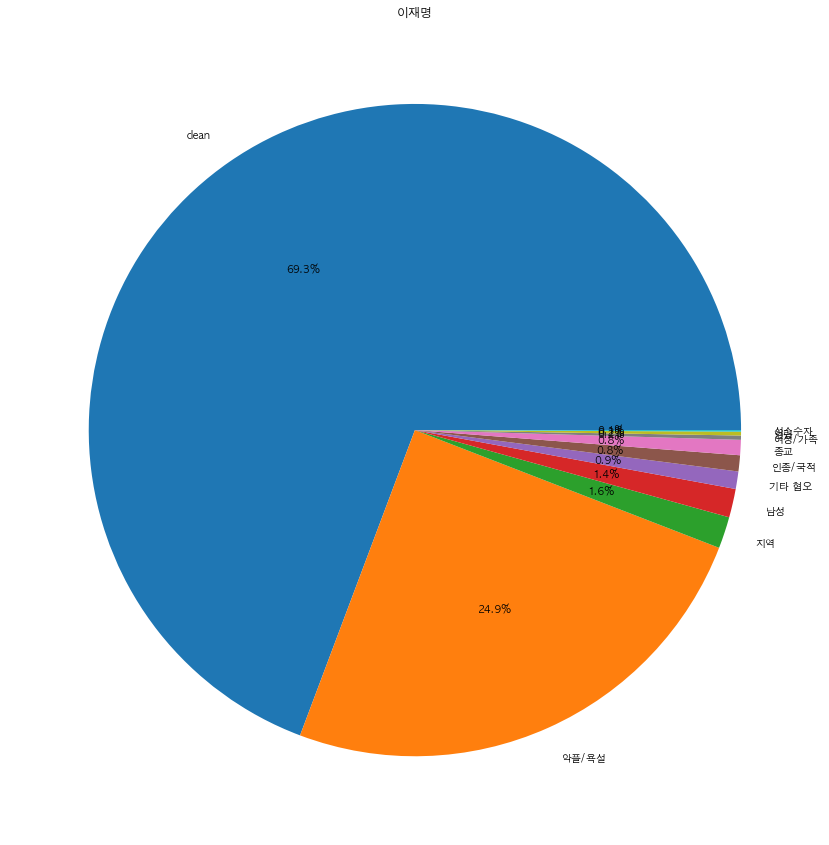

In [18]:
plt.rcParams['font.family'] = 'AppleGothic'
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
plt.title('이재명')
plt.pie(new_df2['result'].value_counts()/len(new_df),
        labels = new_df2['result'].unique(),
        autopct = '%.1f%%')
plt.show()

In [19]:
bad = new_df[new_df['악플/욕설']>=0.60]

In [20]:
bad[:30]

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
7,싸구려 인간 윤여준 윤성열이 대통령 하겠다고 하자 윤씨 족보 운운하며 칭찮하던 사람...,0.02,0.01,0.01,0.04,0.01,0.01,0.01,0.04,0.73,0.16
16,이재명후보가 이랬으면 난리도 아니였을 언론 언론이 국민의 눈과귀를 흐리고 여론몰이로...,0.03,0.01,0.01,0.01,0.01,0.02,0.02,0.09,0.71,0.10
22,저런걸 믿고 좋다고 찍어주는 국민들이 있다는것 돈준다는 공약도 문제이지만 그 공약들...,0.01,0.00,0.01,0.01,0.01,0.04,0.03,0.03,0.64,0.09
26,총괄선대위원장 앞에 이재명 패거리들 석고대죄 했니 이마 바닥에 찧었니 뭐 그래도 우...,0.01,0.01,0.01,0.02,0.00,0.02,0.01,0.02,0.61,0.27
28,투표권이 생긴 이후 쭉 민주당만 찍었던 사람으로서 아직 투표 어떻게 할지 결정 못 ...,0.01,0.01,0.01,0.02,0.01,0.03,0.02,0.04,0.65,0.15
32,이재명당이 스포츠정신을 얘기하네 우왕 양심도없네,0.01,0.01,0.01,0.02,0.01,0.03,0.02,0.02,0.72,0.16
40,민주당 절실하다는 개소리 좀 하지 말라고 해라 후보가 이재명이면서 절실하긴 개코나 ...,0.02,0.01,0.01,0.02,0.01,0.03,0.02,0.04,0.87,0.03
53,이재명과 손잡은 윤여준 경제 모르는 후보가 대통령 되는 건 공포 박정희도 전두환도 ...,0.01,0.01,0.01,0.01,0.08,0.02,0.02,0.05,0.69,0.05
59,아이가 2번을 표시하니까 이재명이 아이 입을 막아버리겠다는 시츄에이션이냐 진짜 이런...,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.02,0.61,0.27
61,이재명 지지하는 것들 사람으로도 안보는 게 이걸 정확히 인지하고 있다는거고 이걸 무...,0.01,0.01,0.01,0.05,0.01,0.02,0.04,0.06,0.75,0.07


In [21]:
bad['text'] = bad['text'].apply(lambda x:clean_text(x))
bad['selected_text'] = bad['text'].apply(lambda x:clean_text(x))

In [22]:
bad['temp_list'] = bad['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in bad['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,이재명,2148
1,윤석열,529
2,이재명이,422
3,이재명은,281
4,이재명을,199
5,뉴스,198
6,이재명의,192
7,이,184
8,출처,181
9,그,176


In [23]:
def remove_stopword(x):
    return [y for y in x if y not in ['출처','것','합니다','있는','할','그','더','다','표','안','거','수','게','위해','좀','진짜','하는','왜','sangjungsim','너무','내가','되면','그냥','난','내','걍','이','또','저','한','하고','이런']]
bad['temp_list'] = bad['temp_list'].apply(lambda x:remove_stopword(x))

In [24]:
top = Counter([item for sublist in bad['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,윤석열,529
2,이재명이,422
3,이재명은,281
4,이재명을,199
5,뉴스,198
6,이재명의,192
7,민주당,170
8,후보,152
9,대통령,150
10,대장동,147


In [25]:
ysy = bad[bad['text'].str.contains('윤석렬')]
del ysy["selected_text"]
del ysy["temp_list"]
ysy[:20]

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
847,이재명은 항상 바쁘다 전문분야의 유능하신 분들의 조언을 듣고자 이재명은 부지런히 뛴...,0.18,0.01,0.01,0.03,0.01,0.03,0.02,0.07,0.62,0.03
1001,이재명의 장점의 추진력인데 추진하면 이권사업의 똥파리는 몰려옴 그렇다고 이명박처럼 ...,0.10,0.01,0.01,0.05,0.01,0.01,0.02,0.04,0.73,0.07
1428,이재명 은 우리가 더 열심히 뛰어 대통령 만들어 주면 제일 먼저 검찰과 윤석렬 에게...,0.03,0.01,0.02,0.02,0.02,0.02,0.03,0.21,0.85,0.02
2093,여론조사 이재명 윤석열 접전 토론 점수 엇비슷 다음 뉴스 김건희의 거짓말 주가...,0.01,0.01,0.01,0.07,0.01,0.03,0.04,0.03,0.68,0.07
2378,제 개인적인 생각에는 이재명을 부추겨서 위하는척하며윤석렬과의 대리 싸움시키려는 의도...,0.01,0.01,0.01,0.02,0.01,0.04,0.04,0.05,0.80,0.05
2595,거짓으로 공포를 유발하고 범죄로 국민의 돈을 뺏고 그 죄 를 덮어씌울 희생양 을 찾...,0.01,0.01,0.01,0.02,0.00,0.02,0.04,0.04,0.70,0.11
3339,이재명은 논란이된 법카비용 백만원 내놓고 윤석렬은 논란이된 특활비 내놓는걸로 마무리하자,0.02,0.02,0.01,0.03,0.01,0.01,0.02,0.14,0.80,0.05
3929,근데 진짜 밈으로 돌아가는 커뮤니티나sns가 무서운 게 윤석렬이같은채널에서 개소리한...,0.01,0.01,0.01,0.02,0.01,0.03,0.02,0.03,0.68,0.10
5305,제주도 어마어마 하게 모였네요 그 자리에서 윤석렬은 쫓겨 났다지요 중도층 대선후보 ...,0.05,0.02,0.03,0.02,0.01,0.02,0.04,0.29,0.64,0.02
5670,윤석렬은 의자에 다리 올림 이재명은 현관에 바지 내림,0.02,0.01,0.03,0.02,0.01,0.01,0.03,0.13,0.78,0.05


In [26]:
female = new_df[new_df['여성/가족']>=0.60]

In [27]:
female[:30]

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
967,뉴스공장 쎈언니 증언 울산택시1300명 이재명 지지선언 출처,0.90,0.01,0.04,0.04,0.01,0.02,0.02,0.08,0.07,0.08
1472,들어는봤나 이재명이라고,0.81,0.05,0.02,0.02,0.02,0.03,0.05,0.11,0.06,0.03
1894,분석해야 하는 애널리스트들도 개념 정리가 잘 안되는 NFT 방식 관련 회사들 대부분...,0.66,0.01,0.02,0.06,0.06,0.03,0.03,0.44,0.08,0.06
3001,유선으로 형수님께 쌍욕한 인사가 아동이 뭐 온라인 스토킹을 뭐 지나가다 웃고 갑니다...,0.63,0.04,0.02,0.01,0.02,0.03,0.01,0.15,0.11,0.16
3012,이재명 정치보복으로 내일 바꿀수 없다 반성하고 사과하라,0.75,0.01,0.01,0.05,0.02,0.03,0.02,0.14,0.29,0.05
3086,2022 02 11 이데일리 220211 036 오늘은 대장동 말고 백현동 두산 특...,0.69,0.02,0.03,0.01,0.01,0.01,0.01,0.06,0.19,0.18
3174,문재인 윤석열 비판하며 본격 대선 개입 그러나 이재명에 도움이 되지 못하고 오히려 출처,0.70,0.01,0.02,0.03,0.01,0.01,0.01,0.04,0.11,0.23
3439,이재명을 왜 싫어하실까요 이재명이 문프를 저격했기에 그런데 이제는 문프보다도 이재명...,0.77,0.01,0.01,0.03,0.01,0.02,0.01,0.04,0.08,0.22
3741,팩트체크로 확인된 사실도 부인하고 오리발작전만 펼치면 조 중 동을 위시한 수꼴언론들...,0.62,0.02,0.02,0.01,0.01,0.01,0.01,0.04,0.16,0.28
4580,전국 9개 도지사의 업무추진비 집행 내역을 비교하니 경기지사의 경우만 돈을 쓸 당시...,0.90,0.01,0.03,0.04,0.01,0.02,0.03,0.11,0.07,0.09


In [28]:
female['text'] = female['text'].apply(lambda x:clean_text(x))
female['selected_text'] = female['text'].apply(lambda x:clean_text(x))

In [29]:
female['temp_list'] = female['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in female['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,이재명,76
1,윤석열,19
2,이재명이,13
3,이재명은,11
4,출처,9
5,다,9
6,문재인,7
7,더,7
8,민주당,7
9,이런,7


In [30]:
def remove_stopword(x):
    return [y for y in x if y not in ['출처','것','합니다','있는','할','그','더','다','표','안','거','수','게','위해','좀','진짜','하는','왜','sangjungsim','너무','내가','되면','그냥','난','내','걍','이','또','저','한','하고','이런']]
bad['temp_list'] = bad['temp_list'].apply(lambda x:remove_stopword(x))

In [31]:
top = Counter([item for sublist in female['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,윤석열,19
2,이재명이,13
3,이재명은,11
4,출처,9
5,다,9
6,문재인,7
7,더,7
8,민주당,7
9,이런,7
10,하는,6


In [32]:
male = new_df[new_df['남성']>=0.60]

In [33]:
male

,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
36,일요일의 남자 송해쏭 개사 안녕하세요 안녕하세요 이재명의 자지 개자지,0.03,0.63,0.02,0.02,0.01,0.03,0.02,0.01,0.23,0.06
685,소확행 곰약 비록 작은 것 같지만 국민들에게 확실하게 행복을 드리는 공야 소학행 공...,0.03,0.93,0.02,0.04,0.03,0.02,0.02,0.03,0.07,0.04
880,이재명 부산캠페인 현실버전 불어터진 라면맛 출처,0.15,0.85,0.02,0.02,0.04,0.02,0.01,0.03,0.06,0.04
2275,이재명 부부의 권력비리가 까도까도 끝이 보이지 않네여 거짓과 사기 파렴치한 타고난 ...,0.05,0.93,0.02,0.04,0.03,0.03,0.02,0.02,0.04,0.04
2470,앞으로 제대로 나를위해 이재명 D 26 2월 11일 금 이재명 더불어민주당 제20대...,0.03,0.74,0.05,0.02,0.03,0.01,0.01,0.05,0.13,0.08
2824,내용 설마 불쏘시개 조져스 찬양은 아니길 빌어 재판 중인 범죄자야 이재명에 이어서 ...,0.03,0.83,0.04,0.10,0.01,0.03,0.01,0.02,0.08,0.05
4832,아직도 이런 주관적ㄱ 자료를 퍼나르네 이재명의 아전인수식 자료 국민 누가 공약이행율...,0.01,0.75,0.02,0.02,0.02,0.02,0.02,0.03,0.17,0.04
5810,털어서 먼지 안 나오면 사람이 아니죠 뒤에서 상대방 비방만 하는건 자기살 깍아 먹는...,0.11,0.74,0.02,0.02,0.13,0.02,0.01,0.05,0.07,0.04
5981,이낙연은 배신의강 건너갔어요 자격미달자 를 범죄자를 뽑아달라는게 말이 안댐 죽어도 ...,0.04,0.89,0.03,0.04,0.06,0.03,0.01,0.05,0.06,0.03
6834,이재명 앞으로 제대로 나를위해이재명 이재명은합니다 윤석열,0.01,0.61,0.03,0.01,0.01,0.01,0.02,0.03,0.25,0.09


In [34]:
male['text'] = male['text'].apply(lambda x:clean_text(x))
male['selected_text'] = male['text'].apply(lambda x:clean_text(x))

In [35]:
male['temp_list'] = male['selected_text'].apply(lambda x:str(x).split())
male['temp_list'] = male['temp_list'].apply(lambda x:remove_stopword(x))

In [36]:
top = Counter([item for sublist in male['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,윤석열,6
2,이재명의,5
3,이재명은,5
4,이재명이,5
5,후보,4
6,하늘이,4
7,찍으면,4
8,큰,3
9,국민,3
10,민주당,3
